# 第二章作业
这个notbook需要Interpolation_H.py和Fitting_Square.py两个文件

In [5]:
import numpy as np
import sympy as symp
import Interpolation_H as Interpolation
import Fitting_Square as FS

1. 代码如下

In [13]:
Outcome = Interpolation.Lagrange_Interval(
    [0.46, 0.47, 0.48, 0.49], [0.484655, 0.4937452, 0.5027498, 0.5116683], [0.472]
)
z = symp.symbols('z')
Sol = symp.solve(Outcome[0]-0.5, z)
print(f'f(0.472)={Outcome[1]}')
for i in range(len(Sol)):
    print(f'f({Sol[i]})=0.5')

f(0.472)=[0.495552983991949]
f(-6.27684300313076 + 0.e-21*I)=0.5
f(0.476936093049039 + 0.e-22*I)=0.5
f(2.07390691052317 - 0.e-22*I)=0.5


2. 插值多项式如下

In [16]:
Outcome = Interpolation.Hermite_Interval([1, 2], [2, 3], [0, -1])
print(f'{Outcome}')

-3.0*z**3 + 13.0*z**2 - 17.0*z + 9.0


3. 三次和五次插值多项式有下列代码给出

In [17]:
Three_Interpolation = Interpolation.Piecewise_Her_Interpolation(
    [2.2, 2.4, 2.6],
    [0.5207843, 0.5104147, 0.4813306],
    [-0.0014878, -0.1004889, -0.1883635],
)
Five_Interpolation = Interpolation.Hermite_Interval(
    [2.2, 2.4, 2.6],
    [0.5207843, 0.5104147, 0.4813306],
    [-0.0014878, -0.1004889, -0.1883635],
)

print(f'三次厄米插值：{Three_Interpolation}')
print(f'五次厄米插值：{Five_Interpolation}')

三次厄米插值：Piecewise((0.0429825000000363*z**3 - 0.54408200000023*z**2 + 1.76836709999975*z - 1.19394410000018, (z <= 2.4) & (z > 2.2)), (0.0497149999999928*z**3 - 0.592549000000048*z**2 + 1.88467109999993*z - 1.28697385999997, (z <= 2.6) & (z > 2.4)))
五次厄米插值：-0.00021875000129512*z**5 + 0.0110406250169035*z**4 - 0.0470150000764988*z**3 - 0.247083874797681*z**2 + 1.32371849974152*z - 0.942254419875098


4. 我的拉格朗日插值的函数支持复数域插值

5. 见程序运行结果，注意这里的基函数参数列表中元素只能是符号表达式

In [7]:
z = symp.symbols('z')
Outcome = FS.Best_Square_Fitting([1, 2, 3, 4, 6, 7, 8], [2, 3, 6, 7, 5, 3, 2], [symp.S(1), z, z**2])
print(f'最佳二次拟合函数为{Outcome}')

最佳二次拟合函数为-0.386363636363635*z**2 + 3.43181818181817*z - 1.31818181818178


6. 见程序运行结果

In [9]:
z = symp.symbols('z')
Outcome = FS.Best_Square_Fitting([0.3, 0.5, 0.6, 0.7, 0.9], [1.37731, 1.48766, 1.53879, 1.58653, 1.67], [symp.S(1), symp.sin(z)])
print(f'最佳二次拟合函数为{Outcome}')

最佳二次拟合函数为0.600008128555637*sin(z) + 1.1999975635783


7. 见运行结果

In [11]:
print(f"{(1/6)*(2-0)*(1+4*np.exp(-1)+np.exp(-4))}")

0.8299444678581678


15. 将$e^{-x^2-y^2}$在$10 \times 10$的正方形区域内离散化后进行快速傅里叶变换和逆变换


[[ 3.54490770e+03+0.00000000e+00j -1.60587519e+03+1.79259463e-11j
   1.19432452e+03-2.66506539e-11j ... -7.29132758e+02-2.43999258e-11j
   1.19432452e+03+2.66481873e-11j -1.60587519e+03-1.78733610e-11j]
 [-1.60587519e+03+1.79447568e-11j -1.89112780e-16+3.29557021e-15j
  -3.35338769e-15+3.38224032e-15j ...  2.18547482e-14+2.38521620e-15j
  -6.92585518e-15+1.99009988e-15j  1.24039596e-15-1.45289819e-14j]
 [ 1.19432452e+03-2.66666689e-11j -9.15806507e-16-7.58809970e-16j
  -2.22270927e-15+2.00957615e-15j ... -2.20119923e-14+5.47867254e-15j
  -1.60710836e-15+2.59823954e-15j  1.55119673e-15+2.22663824e-15j]
 ...
 [-7.29132758e+02-2.44191807e-11j -1.14077169e-15-2.45629572e-16j
  -2.99213719e-15+2.09802315e-15j ...  1.62830209e-14-1.01347432e-15j
  -6.67084777e-15-1.91415588e-15j  1.11444603e-15-6.24598269e-15j]
 [ 1.19432452e+03+2.66034484e-11j  9.15806507e-16-7.58809970e-16j
  -4.38375001e-15-6.06106113e-16j ... -2.22753170e-14-5.09711521e-15j
   1.60710836e-15+2.59823954e-15j -1.55119673e-

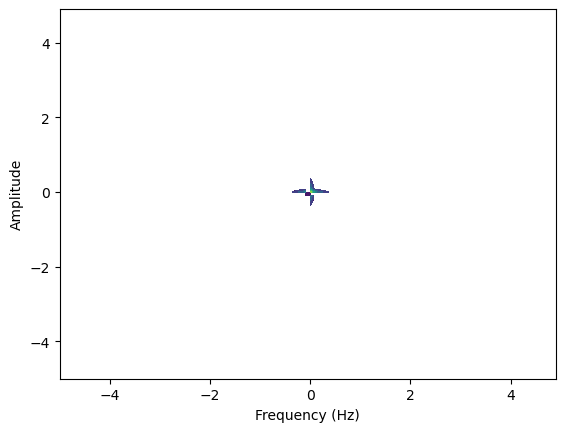

[[2.77758438e-11+3.10219551e-30j 5.12637222e-11-2.34074961e-18j
  1.12482876e-10-3.06004866e-17j ... 2.68826188e-10+8.42805370e-18j
  1.12482894e-10+1.18098198e-17j 5.12636866e-11+5.52526474e-17j]
 [5.12637932e-11-1.73091154e-17j 7.47515472e-11-2.90931396e-17j
  1.35970790e-10-4.89587493e-17j ... 2.92314013e-10+5.70426043e-18j
  1.35970843e-10-5.53104310e-18j 7.47514051e-11+2.03366568e-17j]
 [1.12483018e-10-1.83848117e-17j 1.35970897e-10-3.91368100e-17j
  1.97189962e-10-6.92930183e-17j ... 3.53533185e-10-5.21640259e-18j
  1.97190140e-10+4.44287325e-18j 1.35970772e-10+3.69379186e-17j]
 ...
 [2.68826206e-10-8.99361682e-17j 2.92314031e-10-7.56802693e-17j
  3.53533203e-10-1.31012045e-16j ... 5.09876408e-10-1.90637598e-17j
  3.53533274e-10-3.69803729e-17j 2.92313871e-10-2.29365490e-17j]
 [1.12482894e-10-2.57712795e-17j 1.35970737e-10-3.58323774e-17j
  1.97189873e-10-6.08373544e-17j ... 3.53533043e-10+4.55686652e-17j
  1.97190051e-10+2.15107881e-20j 1.35970630e-10+4.76704878e-17j]
 [5.126384

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_start, x_end, x_step = -5, 5, 0.1
y_start, y_end, y_step = -5, 5, 0.1

x, y = np.meshgrid(np.arange(x_start, x_end, x_step), np.arange(y_start, y_end, y_step))
z = np.exp(-x**2) + np.exp(-y**2)

fft = np.fft.fft2(z)
print(fft)

freq_x = np.fft.fftfreq(len(x[0]), x_step)
freq_y = np.fft.fftfreq(len(y), y_step)
plt.contourf(freq_x, freq_y, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

#*逆快速傅里叶变换
ifft = np.fft.ifft2(fft)
print(ifft)